# Worksheet 3: Cleaning and Wrangling Data


### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* distinguish vectors and data frames in R, and how they relate to each other
* define the term "tidy data"
* discuss the advantages and disadvantages of storing data in a tidy data format
* recall and use the following tidyverse functions and operators for their intended data wrangling tasks:
    - `select`
    - `filter`
    - `%>%`
    - `map`
    - `mutate`
    - `summarize`
    - `group_by`
    - `pivot_longer`
    - `separate`
    - `%in%`

In [68]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
source("tests_worksheet_03.R")
source("cleanup_worksheet_03.R")
options(repr.matrix.max.rows = 6)

**Question 0.0** Multiple Choice: 
<br> {points: 1}

Which statement below is incorrect about vectors and data frames in R?

A. the columns of data frames are vectors

B. data frames can have columns of different types (e.g., a column of numeric data, and a column of character data)

C. vectors can have elements of different types (e.g., element one can be numeric, and element 2 can be a character)

D. data frames are a special kind of list


*Assign your answer to an object called `answer0.0`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [2]:
# Replace the fail() with your answer. 

# your code here
answer0.0 <- "C"

In [3]:
test_0.0()

[1] "Success!"


**Question 0.1** Multiple Choice: 
<br> {points: 1}

Which of the following does **_not_** characterize a tidy dataset?

A. each row is a single observation

B. each value should not be in a single cell

C. each column is a single variable

D. each value is a single cell


*Assign your answer to an object called `answer0.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [4]:
# Replace the fail() with your answer. 

# your code here
answer0.1 <- "B"

In [5]:
test_0.1()

[1] "Success!"


**Question 0.2** Multiple Choice: 
<br> {points: 1}

For which scenario would using one of the `group_by()` + `summarize()` be appropriate?

A. To apply the same function to every row. 

B. To apply the same function to every column.

C. To apply the same function to groups of rows. 

D. To apply the same function to groups of columns.

*Assign your answer to an object called `answer0.2`.  Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [6]:
# Replace the fail() with your answer. 

# your code here
answer0.2 <- "C"

In [7]:
test_0.2()

[1] "Success!"


**Question 0.3** Multiple Choice: 
<br> {points: 1}

For which scenario would using one of the `purrr` `map_*` functions be appropriate?

A. To apply the same function to groups of rows.

B. To apply the same function to every column.

C. To apply the same function to groups of columns. 

D. All of the above.

*Assign your answer to an object called `answer0.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).**

In [8]:
# Replace the fail() with your answer. 

# your code here
answer0.3 <- "B"

In [9]:
test_0.3()

[1] "Success!"


## 1. Assessing avocado prices to inform restaurant menu planning

It is a well known that millennials LOVE avocado toast (joking...well mostly 😉), and so many restaurants will offer menu items that centre around this delicious food! Like many food items, avocado prices fluctuate. So a restaurant who wants to maximize profits on avocado-containing dishes might ask if there are times when the price of avocados are less expensive to purchase? If such times exist, this is when the restaurant should put avocado-containing dishes on the menu to maximize their profits for those dishes. 

<img align="left" src="https://www.averiecooks.com/wp-content/uploads/2017/07/egghole-2.jpg" width="150" />

*Source: https://www.averiecooks.com/egg-hole-avocado-toast/*

To answer this question we will analyze a data set of avocado sales from multiple US markets. This data was downloaded from the [Hass Avocado Board website](http://www.hassavocadoboard.com/) in May of 2018 & compiled into a single CSV. Each row in the data set contains weekly sales data for a region. The data set spans the year 2015-2018.

Some relevant columns in the dataset:

- `Date` - The date in year-month-day format
- `average_price` - The average price of a single avocado
- `type` - conventional or organic
- `yr` - The year
- `region` - The city or region of the observation
- `small_hass_volume` in pounds (lbs)	
- `large_hass_volume` in pounds (lbs)		
- `extra_l_hass_volume`	in pounds (lbs)	
- `wk` - integer number for the calendar week in the year (e.g., first week of January is 1, and last week of December is 52).

To answer our question of whether there are times in the year when avocados are typically less expensive (and thus we can make more profitable menu items with them at a restaurant) we will want to create a scatter plot of `average_price` (y-axis) versus `Date` (x-axis).

**Question 1.1** Multiple Choice:
<br> {points: 1}

Which of the following is not included in the `csv` file?

A. Average price of a single avocado.

B. The farming practice (production with/without the use of chemicals). 

C. Average price of a bag of avocados.

D. All options are included in the data set.

*Assign your answer to an object called `answer1.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).** 

In [10]:
# Replace the fail() with your answer. 

# your code here
answer1.1 <- "C"

In [11]:
test_1.1()

[1] "Success!"


**Question 1.2** Multiple Choice:
<br> {points: 1}

The rows in the data frame represent:

A. daily avocado sales data for a region

B. weekly avocado sales data for a region

C. bi-weekly avocado sales data for a region

D. yearly avocado sales data for a region

*Assign your answer to an object called `answer1.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [12]:
# Replace the fail() with your answer. 

# your code here
answer1.2 <- "B"

In [13]:
test_1.2()

[1] "Success!"


**Question 1.3** 
<br> {points: 1}

The first step to plotting total volume against average price is to read the file `avocado_prices.csv` using the shortest relative path. The data file was given to you along with this worksheet, but you will have to look to see where it is in the `worksheet_03` directory to correctly load it. When you do this, you should also preview the file to help you choose an appropriate `read_*` function to read the data.

*Assign your answer to an object called `avocado`.* 

In [14]:
#... <- ...("...")

# your code here
avocado <- read_csv("data/avocado_prices.csv")
avocado 

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  average_price = col_double(),
  small_hass_volume = col_double(),
  large_hass_volume = col_double(),
  extra_l_hass_volume = col_double(),
  type = col_character(),
  yr = col_double(),
  region = col_character(),
  wk = col_double()
)



Date,average_price,small_hass_volume,large_hass_volume,extra_l_hass_volume,type,yr,region,wk
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2015-12-27,1.33,1036.74,54454.85,48.16,conventional,2015,Albany,52
2015-12-20,1.35,674.28,44638.81,58.33,conventional,2015,Albany,51
2015-12-13,0.93,794.70,109149.67,130.50,conventional,2015,Albany,50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2018-01-21,1.87,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico,3
2018-01-14,1.93,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico,2
2018-01-07,1.62,2894.77,2356.13,224.53,organic,2018,WestTexNewMexico,1


In [15]:
test_1.3()

[1] "Success!"


**Question 1.4** Multiple Choice:
<br> {points: 1}

Why are the 2nd to 5th columns `col_double` instead of `col_integer`?

A. They aren't "real" numbers. 

B. They contain decimals. 

C. They are numbers created using text/letters. 

D. They are `col_integer`... 

*Assign your answer to an object called `answer1.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [16]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1.4 <- "B"

In [17]:
test_1.4()

[1] "Success!"


Before we get started doing our analysis, let's learn about the pipe operator, `%>%`, as it can be very helpful when doing data analysis in R!

### Pipe Operators: `%>%`
Pipe operators allow you to chain together different functions - it takes the output of one statement and makes it the input of the next statement. Having a chain of processing functions is known as a *pipeline*. 

If we wanted to subset the avocado data to obtain just the average prices for organic avocados, we would need to first filter the `type` column using the function: `filter()` for the rows where the type is organic. Then we would need to use the `select()` function to get just the average price column.

Below we illustrate how to do this using the pipe operator, `%>%`, instead of creating an intermediate object as we have in past worksheets: 

> *Note: the indentation on the second line of the pipeline is not required, but added for readability.*

In [18]:
# run this cell
filter(avocado, type == "organic") %>% 
    select(average_price)

average_price
<dbl>
1.83
1.89
1.85
⋮
1.87
1.93
1.62


We can even start off a pipeline by passing the data frame into the first function. This is convenient and aids in readability. You will see this being used often in this course going forward. Below we show an example of this doing the same task we just completed above (subsetting the average price data for organic avocados).

In [19]:
avocado %>% 
    filter( type == "organic") %>% 
    select(average_price)

average_price
<dbl>
1.83
1.89
1.85
⋮
1.87
1.93
1.62


**Question 1.5**

{points: 1}

To answer our question, let's now create the scatter plot where we plot `average_price` on the y-axis versus `Date` on the x-axis. Fill in the ... in the cell below. Copy and paste your finished answer in place of `fail()`. Assign your answer to an object called `avocado_plot`. Don't forget to create proper English axis labels.

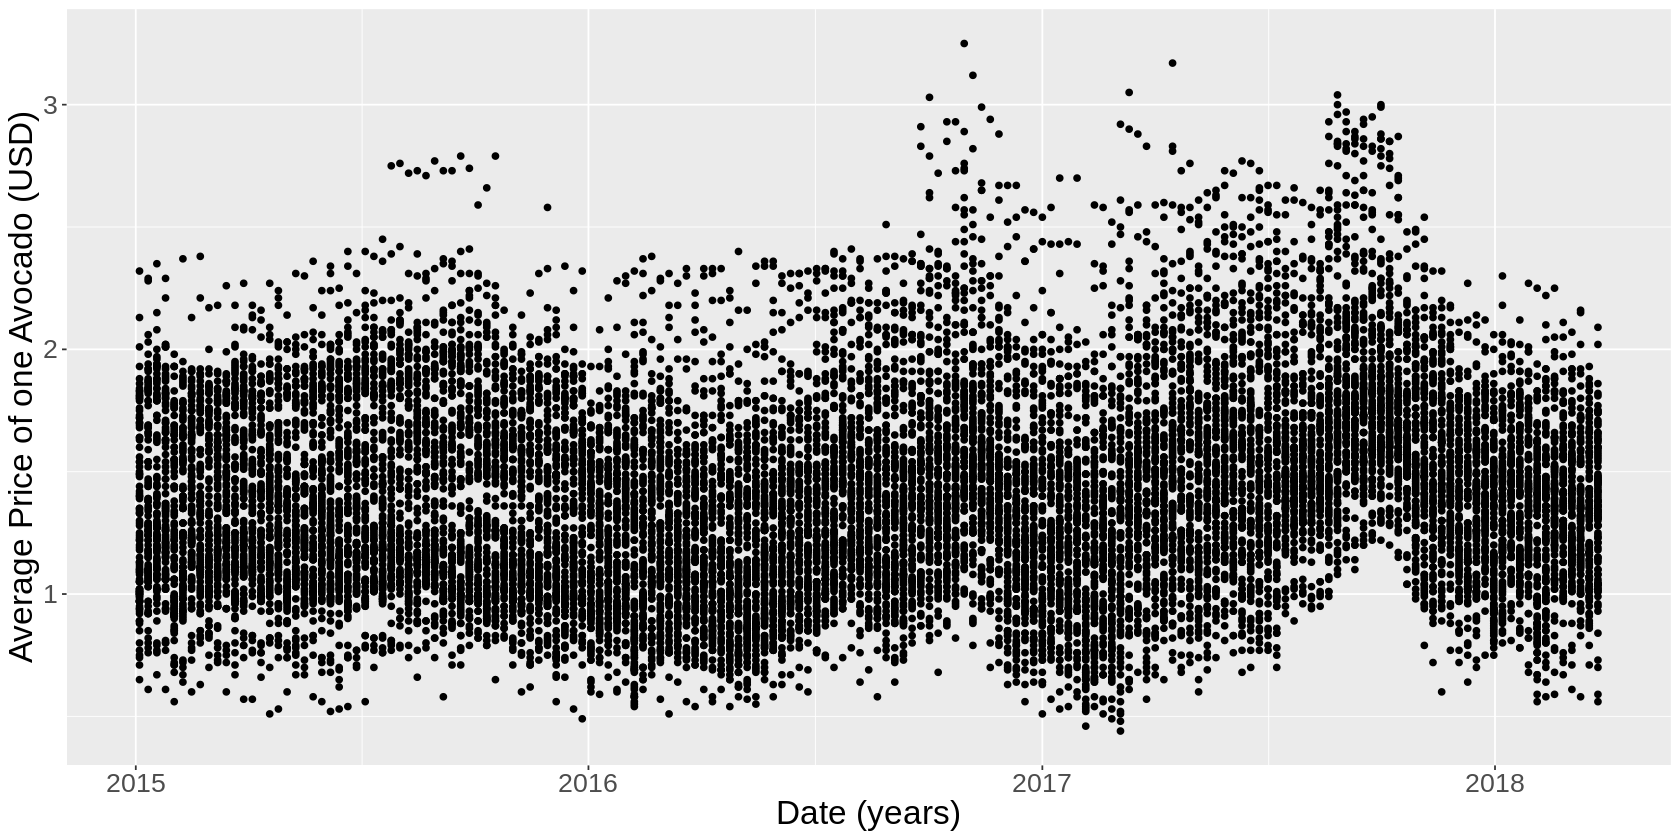

In [20]:
options(repr.plot.width = 14, repr.plot.height = 7) # Modifies the size of the plots
#... <- ... %>%
#    ggplot(aes(x = ..., y = ...)) + 
#        geom_...() +
#        xlab("...") + 
#        ylab("...") + 
#        theme(text = element_text(size=20))


# your code here
avocado_plot <- avocado %>%
   ggplot(aes(x = Date, y = average_price)) + 
       geom_point() +
       xlab("Date (years)") + 
       ylab("Average Price of one Avocado (USD)") + 
       theme(text = element_text(size=20))
avocado_plot

In [21]:
test_1.5()

[1] "Success!"


We might be able to squint and start to see some pattern in the data above, but really what we see in the plot above is not very informative. Why? Because there is a lot of overplotting (data points sitting on top of other data points). What can we do? One solution is to reduce/aggregate the data in a meaningful way to help anwer our question. Remember that we are interested in determining if there are times when the price of avocados are less expensive so that we can recommend when restaurants should put dishes on the menu that contain avocado to maximize their profits for those dishes.

In the data we plotted above, each row is the total sales for avocados for that region for each year. Lets use `group_by` + `summarize` calculate the average price for each week across years and region. We can then plot that aggregated price against the week and perhaps get a clearer picture.

**Question 1.6**
<br> {points: 1}

Create a reduced/aggregated version of the `avocado` data set and name it `avocado_aggregate`. To do this you will want to `group_by` the `wk` column and then use `summarize` to calculate the average price (name that column `average_price`).

In [22]:
#... <- ... %>% 
#    group_by(...) %>% 
#    summarize(... = mean(average_price, na.rm = TRUE))

# your code here
avocado_aggregate <- avocado %>% 
   group_by(wk) %>% 
   summarize(average_price = mean(average_price, na.rm = TRUE))
avocado_aggregate

`summarise()` ungrouping output (override with `.groups` argument)



wk,average_price
<dbl>,<dbl>
1,1.286887
2,1.330519
3,1.341415
⋮,⋮
51,1.331887
52,1.350881
53,1.284151


In [23]:
test_1.6()

[1] "Success!"


**Question 1.7**
<br> {points: 1}

Now let's take the `avocado_aggregate` data frame and use it to create a scatter plot where we plot `average_price` on the y-axis versus `wk` on the x-axis. Assign your answer to an object called `avocado_aggregate_plot`. Don't forget to create proper English axis labels.

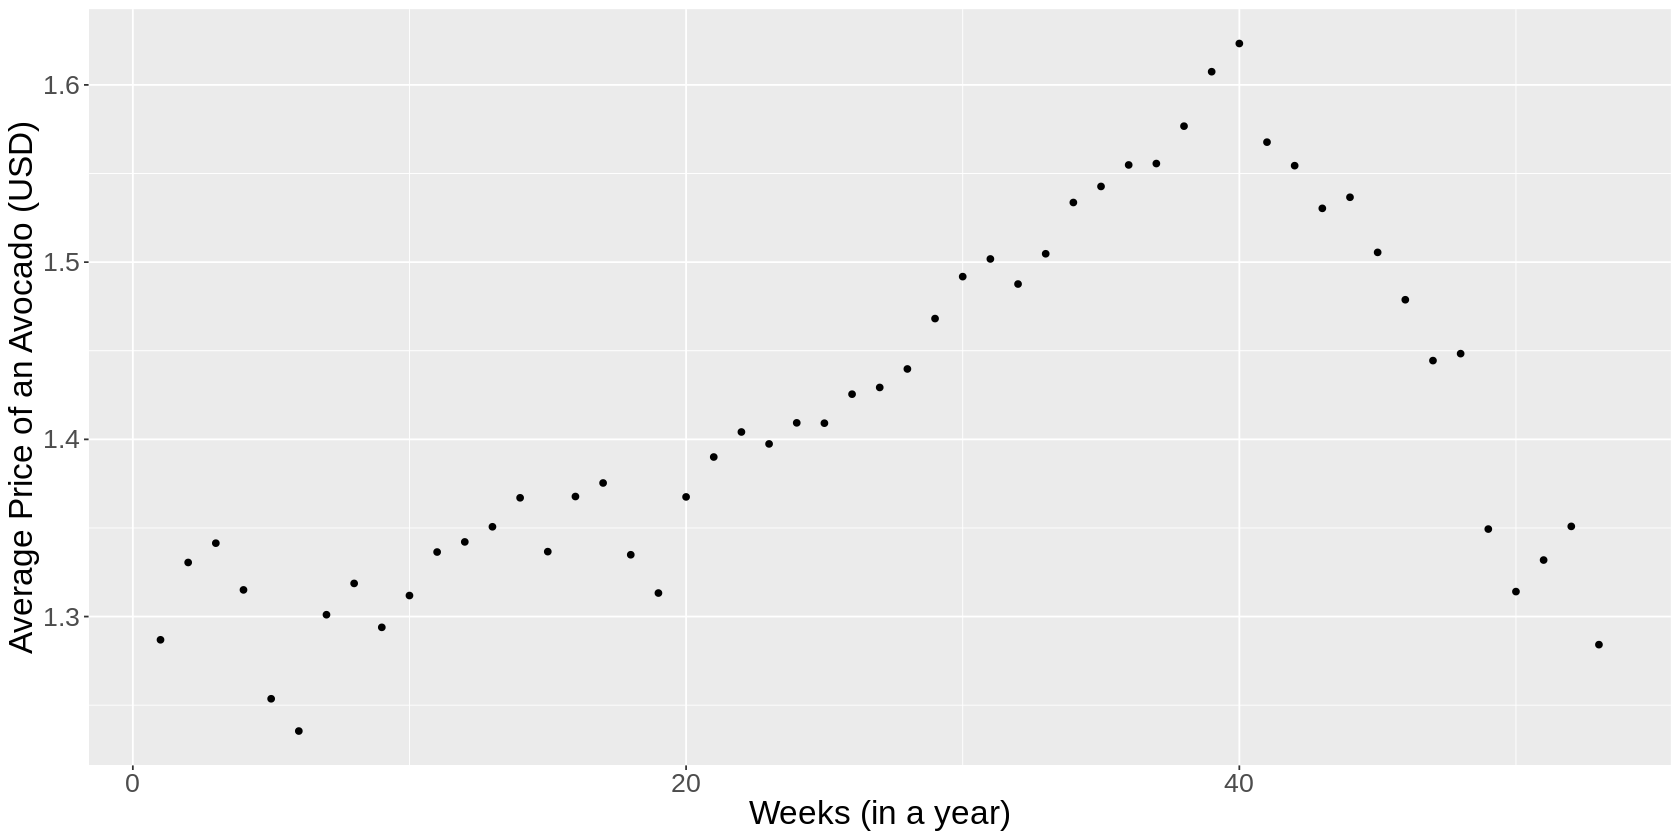

In [24]:
#... <- ... %>%
#    ggplot(aes(x = ..., y = ...)) + 
#        ...() +
#        ...("...") + 
#        ...("...") +
#        theme(text = element_text(size=20))

# your code here
avocado_aggregate_plot <- avocado_aggregate %>%
   ggplot(aes(x = wk, y = average_price)) + 
       geom_point() +
       xlab("Weeks (in a year)") + 
       ylab("Average Price of an Avocado (USD)") +
       theme(text = element_text(size=20))
avocado_aggregate_plot

In [25]:
test_1.7()

[1] "Success!"


We can now see that the prices of avocados does indeed fluctuate throughout the year. And we could use this information to recommend to restaurants that if they want to maximize profit from menu items that contain avocados, they should only offer them on the menu roughly between December and May. 

Why might this happen? Perhaps price has something to do with supply? We can also use this data set to get some insight into that question by plotting total avocado volume (y-axis) versus week. To do this, we will first have to create a column called `total_volume` whose value is the sum of the small, large and extra large-sized avocado volumes. To do this we will have to go back to the original `avocado` data frame we loaded.

**Question 1.8**
<br> {points: 1}

Our next step to plotting `total_volume` per week against week is to use `mutate` to create a new column in the `avocado` data frame called `total_volume` which is equal to the sum of all three volume columns:

Fill in the `...` in the cell below. Copy and paste your finished answer and replace the `fail()`. 

In [26]:
#... <- ... %>%
#     mutate(... = ... + ... + ...) 

# your code here
avocado <- avocado %>%
        mutate(total_volume = small_hass_volume + large_hass_volume + extra_l_hass_volume)
avocado

Date,average_price,small_hass_volume,large_hass_volume,extra_l_hass_volume,type,yr,region,wk,total_volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
2015-12-27,1.33,1036.74,54454.85,48.16,conventional,2015,Albany,52,55539.75
2015-12-20,1.35,674.28,44638.81,58.33,conventional,2015,Albany,51,45371.42
2015-12-13,0.93,794.70,109149.67,130.50,conventional,2015,Albany,50,110074.87
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2018-01-21,1.87,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico,3,4372.65
2018-01-14,1.93,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico,2,5235.68
2018-01-07,1.62,2894.77,2356.13,224.53,organic,2018,WestTexNewMexico,1,5475.43


In [27]:
test_1.8()

[1] "Success!"


**Question 1.9** 
<br> {points: 1}

Now, create another reduced/aggregated version of the `avocado` data frame and name it `avocado_aggregate_2`. To do this you will want to `group_by` the `wk` column and then use `summarize` to calculate the average total volume (name that column `total_volume`).

In [28]:
#... <- ... %>% 
#    group_by(...) %>% 
#    summarize(...)

# your code here
avocado_aggregate_2 <- avocado %>%
                    group_by(wk) %>%
                    summarize(total_volume = mean(total_volume, na.rm = TRUE))
avocado_aggregate_2

`summarise()` ungrouping output (override with `.groups` argument)



wk,total_volume
<dbl>,<dbl>
1,424475.8
2,399580.9
3,412136.8
⋮,⋮
51,319401.3
52,317718.8
53,420974.1


In [29]:
test_1.9()

[1] "Success!"


**Question 1.10** 
<br> {points: 1}

Now let's take the `avocado_aggregate_2` data frame and use it to create a scatter plot where we plot average `total_volume` (in pounds, lbs) on the y-axis versus `wk` on the x-axis. Assign your answer to an object called `avocado_aggregate_plot_2`. Don't forget to create proper English axis labels.

> Hint: don't forget to include the units for volume in your data visualization.

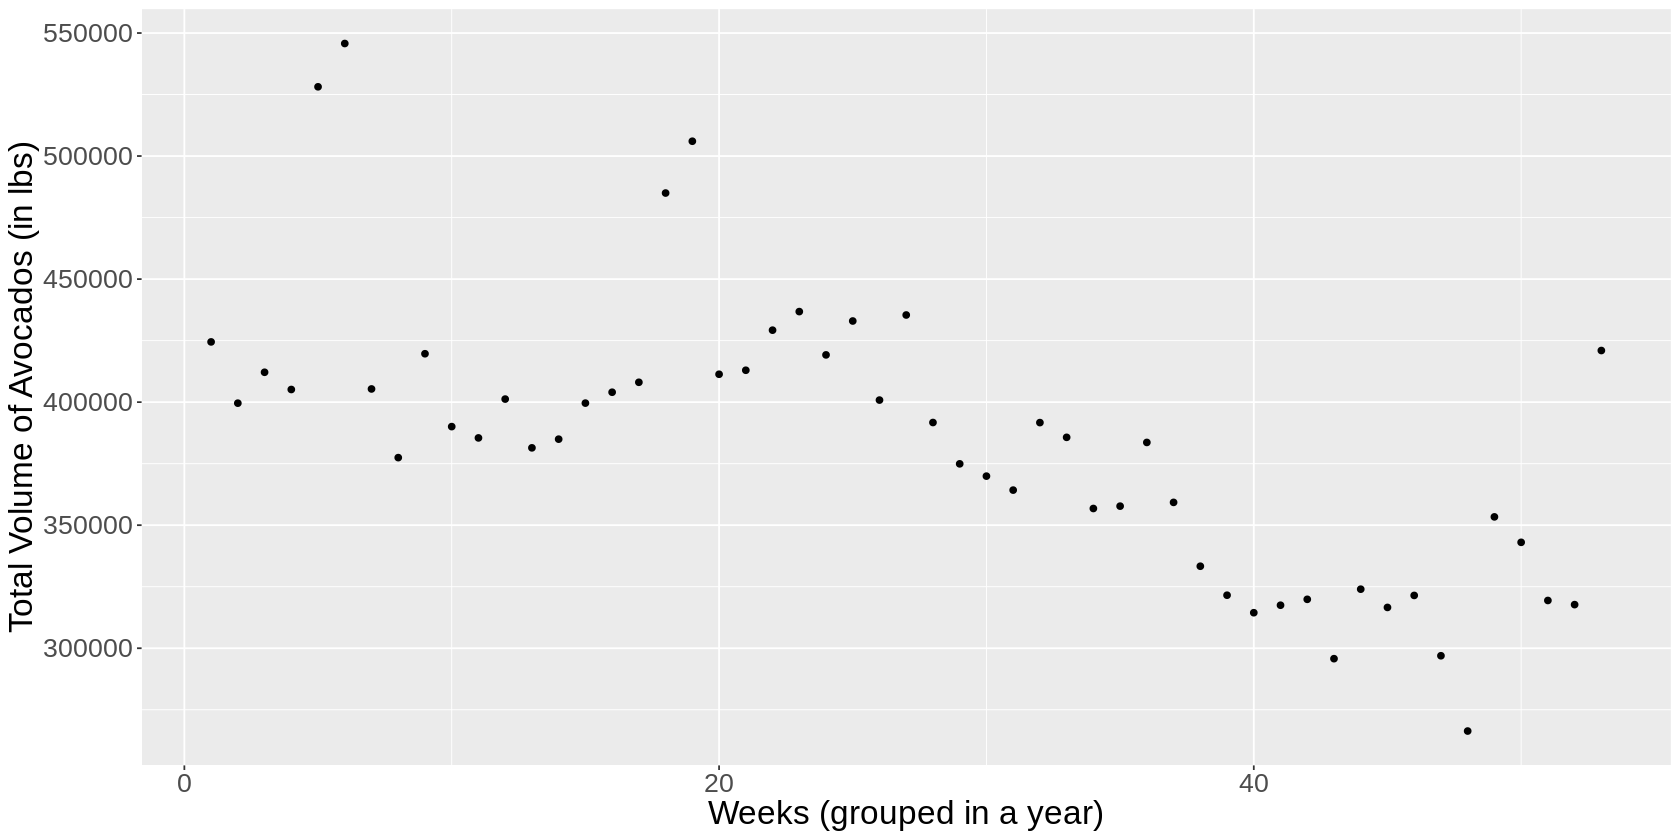

In [30]:
#... <- ... %>%
#    ggplot(aes(x = ..., y = ...)) + 
#        ...() +
#        ...("...") + 
#        ...("...") +
#        theme(text = element_text(size=20))


# your code here
avocado_aggregate_plot_2 <- avocado_aggregate_2 %>%
   ggplot(aes(x = wk, y = total_volume)) + 
       geom_point() +
       xlab("Weeks (grouped in a year)") + 
       ylab("Total Volume of Avocados (in lbs)") +
       theme(text = element_text(size=20))
avocado_aggregate_plot_2

In [31]:
test_1.10()

[1] "Success!"


We can see from the above plot of the average total volume versus the week that there are more avocados sold (and perhaps this reflects what is available for sale) roughly between January to May. This time period of increased volume corresponds with the lower avocado prices. We can *hypothesize* (but not conclude, of course) that the lower prices may be due to an increased availability of avocados during this time period.

## 2. Sea Surface Temperatures in Departure Bay
The next data set that we will be looking at contains environmental data from 1914 to 2018. The data was collected by the DFO (Canada's Department of Fisheries and Oceans) at the Pacific Biological Station (Departure Bay). Daily sea surface temperature (in degrees Celsius) and salinity (in practical salinity units, PSU) observations have been carried out at several locations on the coast of British Columbia. The number of stations reporting at any given time has varied as sampling has been discontinued at some stations, and started or resumed at others.

Presently termed the British Columbia Shore Station Oceanographic Program (BCSOP), there are 12 participating stations; most of these are staffed by Fisheries and Oceans Canada. You can look at data from other stations at http://www.pac.dfo-mpo.gc.ca/science/oceans/data-donnees/lightstations-phares/index-eng.html 

Further information from the Government of Canada's website indicates: 
>  Observations are made daily using seawater collected in a bucket lowered into the surface water at or near the daytime high tide. This sampling method was designed long ago by Dr. John P. Tully and has not been changed in the interests of a homogeneous data set. This means, for example, that if an observer starts sampling one day at 6 a.m., and continues to sample at the daytime high tide on the second day the sample will be taken at about 06:50 the next day, 07:40 the day after etc. When the daytime high-tide gets close to 6 p.m. the observer will then begin again to sample early in the morning, and the cycle continues. Since there is a day/night variation in the sea surface temperatures the daily time series will show a signal that varies with the14-day tidal cycle. This artifact does not affect the monthly sea surface temperature data.

In this worksheet, we want to see if the sea surface temperature has been changing over time. 

**Question 2.1** True or False:
<br> {points: 1}

The sampling of surface water occurs at the same time each day. 

*Assign your answer to an object called `answer2.1`. Make sure your answer is lowercase "true" or lowercase "false".* 

In [32]:
# Replace the fail() with your answer. 

# your code here
answer2.1 <- "false"

In [33]:
test_2.1()

[1] "Success!"


**Question 2.2** Multiple Choice:
<br> {points: 1}

If high tide occurred at 9am today, what time would the scientist collect data tomorrow?

A. 11:10 am 

B. 9:50 am 

C. 10:00 pm 

D. Trick question... you skip days when collecting data. 

*Assign your answer to an object called `answer2.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [34]:
# Replace the fail() with your answer. 

# your code here
answer2.2 <- "B"

In [35]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br> {points: 1}

To begin working with this data, read the file `departure_bay_temperature.csv` using a relative path. Note, this file (just like the avocado data set) is found within the `worksheet_03` directory. 

*Assign your answer to an object called `sea_surface`.* 

In [36]:
# your code here
sea_surface <- read_csv("data/departure_bay_temperature.csv", skip = 2)
sea_surface

Parsed with column specification:
cols(
  Year = col_double(),
  Jan = col_double(),
  Feb = col_double(),
  Mar = col_double(),
  Apr = col_double(),
  May = col_double(),
  Jun = col_double(),
  Jul = col_double(),
  Aug = col_double(),
  Sep = col_double(),
  Oct = col_double(),
  Nov = col_double(),
  Dec = col_double()
)



Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1914,7.2,NA,NA,NA,NA,NA,NA,NA,11.1,10.0,7.3,6.3
1915,5.6,6.6,7.5,9.0,9.9,12.5,14.7,15.8,14.0,8.2,4.4,4.1
1916,1.2,0.1,3.5,6.5,8.0,12.0,13.1,14.0,11.4,7.6,5.4,3.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2016,6.0,7.1,8.4,9.8,13.0,14.2,14.6,14.6,12.6,10.8,8.2,5.5
2017,5.6,4.8,7.1,7.9,10.5,12.4,15.3,15.3,13.1,10.2,8.8,6.9
2018,6.2,6.0,7.1,8.2,NA,NA,NA,NA,NA,NA,NA,NA


In [37]:
test_2.3()

[1] "Success!"


**Question 2.3.1**
<br> {points: 1}

The data above in Question 2.3 is not tidy, which reasons listed below explain why?

A. There are NA's in the data set

B. The variable temperature is split across more than one column

C. Values for the variable month are stored as column names

D. A and C

E. B and C

F. All of the above

Assign your answer to an object called `answer2.3.1`.

In [38]:
# Replace the fail() with your answer. 

# your code here
answer2.3.1 <- "E"

In [39]:
test_2.3.1()

[1] "Success!"


**Question 2.4**
<br> {points: 1}

Given `ggplot` expects tidy data, we need to convert our data into that format. To do this we will use the `pivot_longer()` function. We would like our data to end up looking like this:

| Year | Month | Temperature |
|------|-------|-------------|
| 1914 | Jan   | 7.2         |
| 1914 | Feb   | NA          |
| 1914 | Mar   | NA          |
| ...  | ...   | ...         |
| 2018 | Oct   | NA          |
| 2018 | Nov   | NA          |
| 2018 | Dec   | NA          |


Fill in the `...` in the cell below. Copy and paste your finished answer and replace the `fail()`.

*Assign your answer to an object called `tidy_temp`.*

In [40]:
#... <- sea_surface %>%
#    ...(cols = Jan:Dec, 
#                 names_to = "...", 
#                 values_to = "Temperature")

# your code here
tidy_temp <- sea_surface %>%
            pivot_longer(cols = Jan:Dec,
                        names_to = "Month",
                        values_to = "Temperature")
tidy_temp

Year,Month,Temperature
<dbl>,<chr>,<dbl>
1914,Jan,7.2
1914,Feb,NA
1914,Mar,NA
⋮,⋮,⋮
2018,Oct,NA
2018,Nov,NA
2018,Dec,NA


In [41]:
test_2.4()

[1] "Success!"


**Question 2.5**
<br> {points: 1}

Now that we have our data in a tidy format, we can create our plot that compares the average monthly sea surface temperatures (in degrees Celsius) to the year they were recorded. To make our plots more informative, we should plot each month separately. We can use `filter` to do this before we pipe our data into the `ggplot` function. Let's start out by just plotting the data for the month of November. As usual, use proper English to label your axes :)

*Assign your answer to an object called `nov_temp_plot`.*

> Hint: don't forget to include the units for temperature in your data visualization.

Warning message:
“Removed 7 rows containing missing values (geom_point).”


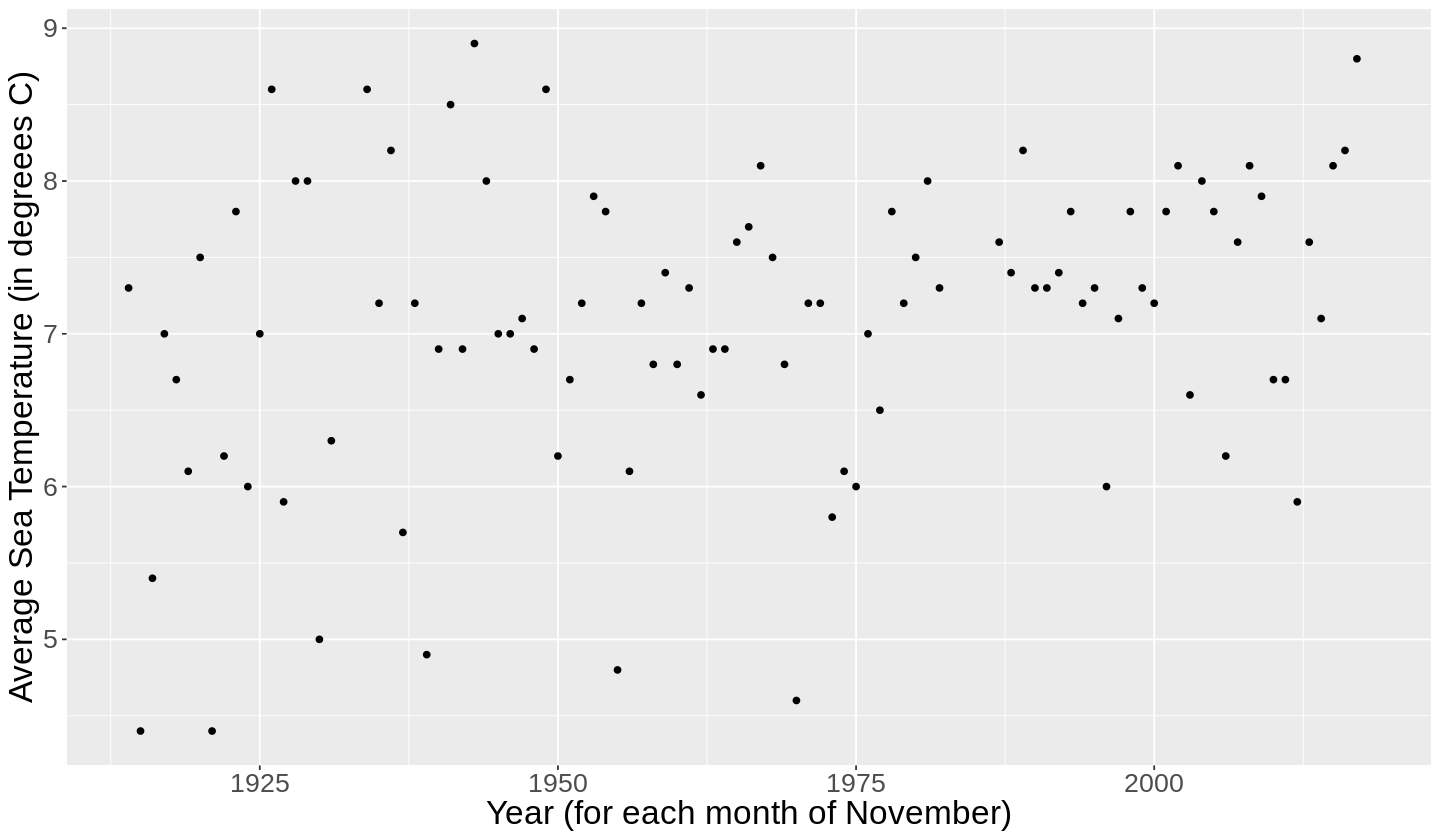

In [42]:
options(repr.plot.width = 12, repr.plot.height = 7)
#... <- ... %>% 
#    filter(... == ...) %>% 
#    ggplot(aes(x = ..., y = ...)) + 
#    geom_point() + 
#    xlab(...) + 
#    ylab(...) +
#    theme(text = element_text(size=20))



# your code here
nov_temp_plot <- tidy_temp %>% 
               filter(Month == "Nov") %>% 
               ggplot(aes(x = Year, y = Temperature)) + 
               geom_point() + 
               xlab("Year (for each month of November)") + 
               ylab("Average Sea Temperature (in degreees C)") +
               theme(text = element_text(size=20))
nov_temp_plot

In [43]:
test_2.5()

[1] "Success!"


We can see that there may be a small decrease in colder temperatures in recent years, and/or the temperatures in recent years look less variable compared to years before 1975. What about other months? Let's plot them! 

Instead of repeating the code above for the 11 other months, we'll take advantage of a `ggplot2` function that we haven't met yet, `facet_wrap`. We will learn more about this function next week, this week we will give you the code for it.

**Question 2.6**
<br> {points: 1}

Fill in the missing code below to plot the average monthly sea surface temperatures to the year they were recorded for all months. Assign your answer to an object called `all_temp_plot`.

> Hint: don't forget to include the units for temperature in your data visualization.

Warning message:
“Removed 86 rows containing missing values (geom_point).”


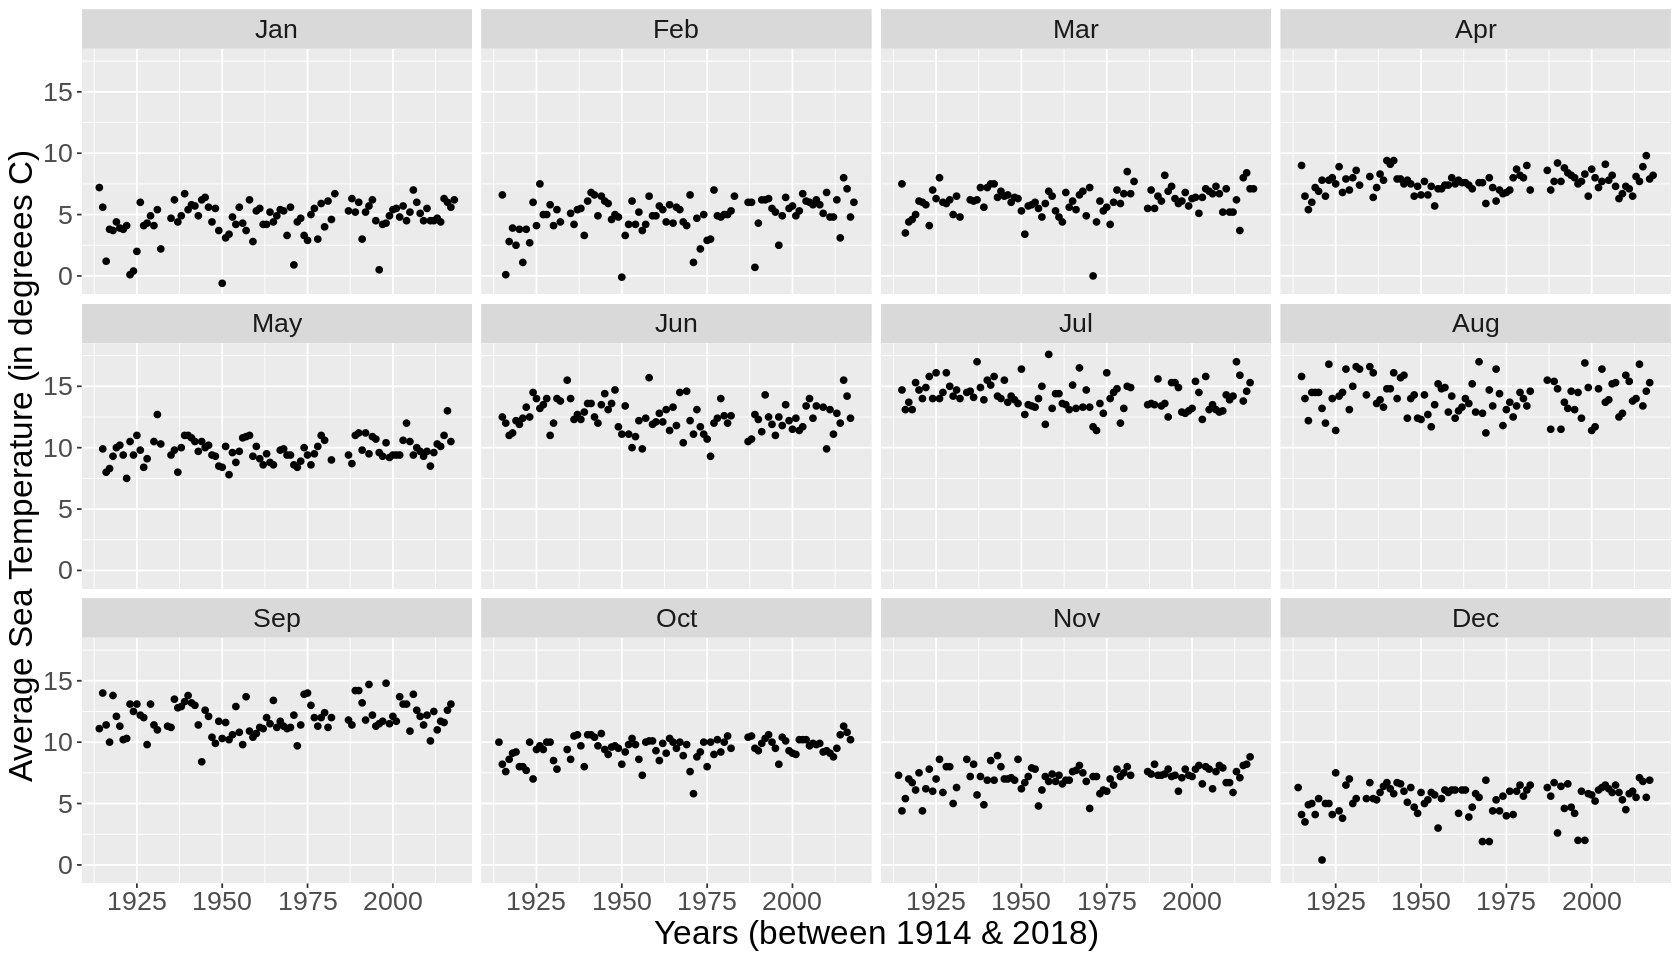

In [44]:
options(repr.plot.width = 14, repr.plot.height = 8)
#... <- ... %>% 
#    ggplot(aes(x = ..., y = ...)) + 
#    geom_point() + 
#    facet_wrap(~ factor(Month, levels = c("Jan","Feb","Mar","Apr","May","Jun",
#                                          "Jul","Aug","Sep","Oct","Nov","Dec"))) +
#    xlab(...) + 
#    ylab(...) +
#    theme(text = element_text(size=20))


# your code here
all_temp_plot <- tidy_temp %>% 
   ggplot(aes(x = Year, y = Temperature)) + 
   geom_point() + 
   facet_wrap(~ factor(Month, levels = c("Jan","Feb","Mar","Apr","May","Jun",
                                         "Jul","Aug","Sep","Oct","Nov","Dec"))) +
   xlab("Years (between 1914 & 2018)") + 
   ylab("Average Sea Temperature (in degreees C)") +
   theme(text = element_text(size=20))
all_temp_plot

In [45]:
test_2.6()

[1] "Success!"


We can see above that some months show a small, but general increase in temperatures, whereas others don't. And some months show a change in variability and others do not. From this it is clear to us that if we are trying to understand temperature changes over time, we best keep data from different months separate.

## 3. Pollution in Madrid
We're working with a data set from Kaggle once again! [This data](https://www.kaggle.com/decide-soluciones/air-quality-madrid) was collected under the instructions from Madrid's City Council and is publicly available on their website. In recent years, high levels of pollution during certain dry periods has forced the authorities to take measures against the use of cars and act as a reasoning to propose certain regulations. This data includes daily and hourly measurements of air quality from 2001 to 2008. Pollutants are categorized based on their chemical properties.

There are a number of stations set up around Madrid and each station's data frame contains all particle measurements that such station has registered from 01/2001 - 04/2008. Not every station has the same equipment, therefore each station can measure only a certain subset of particles. The complete list of possible measurements and their explanations are given by the website:

- `SO_2`: sulphur dioxide level measured in μg/m³. High levels can produce irritation in the skin and membranes, and worsen asthma or heart diseases in sensitive groups.
- `CO`: carbon monoxide level measured in mg/m³. Carbon monoxide poisoning involves headaches, dizziness and confusion in short exposures and can result in loss of consciousness, arrhythmias, seizures or even death.
- `NO_2`: nitrogen dioxide level measured in μg/m³. Long-term exposure is a cause of chronic lung diseases, and are harmful for the vegetation.
- `PM10`: particles smaller than 10 μm. Even though they cannot penetrate the alveolus, they can still penetrate through the lungs and affect other organs. Long term exposure can result in lung cancer and cardiovascular complications.
- `NOx`: nitrous oxides level measured in μg/m³. Affect the human respiratory system worsening asthma or other diseases, and are responsible of the yellowish-brown color of photochemical smog.
- `O_3`: ozone level measured in μg/m³. High levels can produce asthma, bronchytis or other chronic pulmonary diseases in sensitive groups or outdoor workers.
- `TOL`: toluene (methylbenzene) level measured in μg/m³. Long-term exposure to this substance (present in tobacco smoke as well) can result in kidney complications or permanent brain damage.
- `BEN`: benzene level measured in μg/m³. Benzene is a eye and skin irritant, and long exposures may result in several types of cancer, leukaemia and anaemias. Benzene is considered a group 1 carcinogenic to humans.
- `EBE`: ethylbenzene level measured in μg/m³. Long term exposure can cause hearing or kidney problems and the IARC has concluded that long-term exposure can produce cancer.
- `MXY`: m-xylene level measured in μg/m³. Xylenes can affect not only air but also water and soil, and a long exposure to high levels of xylenes can result in diseases affecting the liver, kidney and nervous system.
- `PXY`: p-xylene level measured in μg/m³. See MXY for xylene exposure effects on health.
- `OXY`: o-xylene level measured in μg/m³. See MXY for xylene exposure effects on health.
- `TCH`: total hydrocarbons level measured in mg/m³. This group of substances can be responsible of different blood, immune system, liver, spleen, kidneys or lung diseases.
- `NMHC`: non-methane hydrocarbons (volatile organic compounds) level measured in mg/m³. Long exposure to some of these substances can result in damage to the liver, kidney, and central nervous system. Some of them are suspected to cause cancer in humans.

The goal of this assignment is to see if pollutants are decreasing (is air quality improving) and also compare which pollutant has decreased the most over the span of 5 years (2001 - 2006). 
1. First do a plot of one of the pollutants (EBE). 
2. Next, group it by month and year; calculate the maximum value and plot it (to see the trend through time). 
3. Now we will look at which pollutant decreased the most. Repeat the same thing for every column - to speed up the process, use the `map()` function. First we will look at pollution in 2001 (get the maximum value for each of the pollutants). And then do the same for 2006. 

**Question 3.1** Multiple Choice: 
<br> {points: 1}

What big picture question are we trying to answer?

A. Did EBE decrease in Madrid between 2001 and 2006?

B. Of all the pollutants, which decreased the most between 2001 and 2006? 

C. Of all the pollutants, which decreased the least between 2001 and 2006?

D. Did EBE increase in Madrid between 2001 and 2006?

*Assign your answer to an object called `answer3.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [46]:
# Replace the fail() with your answer. 

# your code here
answer3.1 <- "B"

In [47]:
test_3.1()

[1] "Success!"


**Question 3.2** 
<br> {points: 1}

To begin working with this data, read the file `madrid_pollution.csv`. Note, this file (just like the avocado and sea surface data set) is found in the `worksheet_03` directory. 

*Assign your answer to an object called `madrid`.* 

In [48]:
# your code here
madrid <- read_tsv("data/madrid_pollution.csv")
madrid

Parsed with column specification:
cols(
  date = col_datetime(format = ""),
  BEN = col_double(),
  CO = col_double(),
  EBE = col_double(),
  MXY = col_double(),
  NMHC = col_double(),
  NO_2 = col_double(),
  NOx = col_double(),
  OXY = col_double(),
  O_3 = col_double(),
  PM10 = col_double(),
  PXY = col_double(),
  SO_2 = col_double(),
  TCH = col_double(),
  TOL = col_double(),
  year = col_double(),
  mnth = col_character()
)



date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,year,mnth
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,2001,August
2001-08-01 02:00:00,0.87,0.06,0.88,2.41,0.01,29.71,31.44,1.20,56.52,56.29,1.02,6.90,1.17,6.49,2001,August
2001-08-01 03:00:00,0.66,0.02,0.61,1.60,0.01,22.75,22.46,0.80,64.06,36.65,0.69,6.59,1.17,6.37,2001,August
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2006-04-30 22:00:00,0.88,0.52,0.66,1.71,0.24,87.02,93.67,0.84,21.93,66.77,0.74,6.19,1.35,2.96,2006,April
2006-04-30 23:00:00,1.24,0.57,1.03,2.58,0.24,91.36,100.40,1.29,13.17,56.61,1.14,6.34,1.36,4.97,2006,April
2006-05-01 00:00:00,1.26,0.60,1.09,2.95,0.27,98.05,129.30,1.52,9.34,45.61,1.24,6.98,1.41,5.95,2006,May


In [49]:
test_3.2()

[1] "Success!"


**Question 3.3**
<br> {points: 1}

Now that the data is loaded in R, create a scatter plot that compares ethylbenzene (`EBE`) values against the date they were recorded. This graph will showcase the concentration of ethylbenzene in Madrid over time. As usual, label your axes: 

- x = Date
- y = Ethylbenzene (μg/m³)

*Assign your answer to an object called `EBE_pollution`.*

Warning message:
“Removed 1317 rows containing missing values (geom_point).”


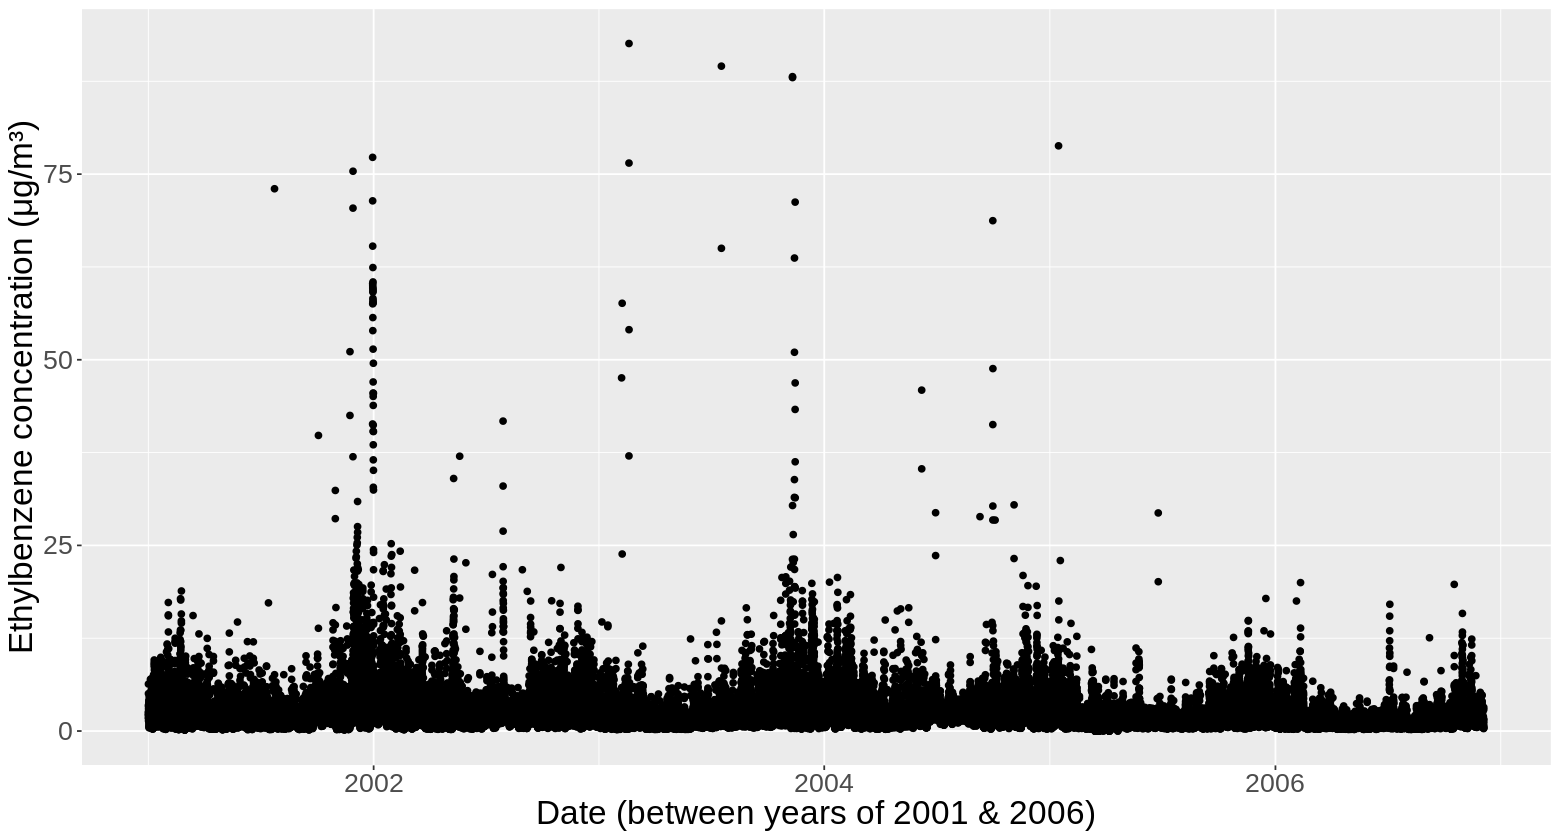

In [50]:
options(repr.plot.width = 13, repr.plot.height = 7)


# your code here
EBE_pollution <- madrid %>%
                ggplot(aes(x= date, y= EBE))+
                geom_point()+
                xlab("Date (between years of 2001 & 2006)") + 
                ylab("Ethylbenzene concentration (μg/m³)") +
                theme(text = element_text(size=20))
EBE_pollution

# Are levels increasing or decreasing?

In [51]:
test_3.3()

[1] "Success!"


We can see from this plot that over time, there are less and less high (> 25 μg/m³) EBE values.

**Question 3.4**
<br> {points: 1}

The question above asks you to write out code that allows visualization of all EBE recordings - which are taken every single hour of every day. Consequently the graph consists of many points and appears densely plotted. In this question, we are going to clean up the graph and focus on max EBE readings from each month. To further investigate if this trend is changing over time, we will use `group_by` and `summarize` to create a new data set.

Fill in the `...` in the cell below. Copy and paste your finished answer and replace the `fail()`.

*Assign your answer to an object called `madrid_pollution`.*

In [52]:
# ... <- ... %>%
#     group_by(year, ...) %>%
#     ...(max_ebe = max(EBE, na.rm = TRUE))
# group by year and moth and take the max 
# your code here
madrid_pollution <- madrid %>%
                    group_by(year, mnth) %>% 
                    summarize(max_ebe = max(EBE, na.rm = TRUE))
madrid_pollution

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,mnth,max_ebe
<dbl>,<chr>,<dbl>
2001,April,12.48
2001,August,8.39
2001,December,77.26
⋮,⋮,⋮
2006,November,12.38
2006,October,19.75
2006,September,12.56


In [53]:
test_3.4()

[1] "Success!"


**Question 3.5**
<br> {points: 1}

Plot the new maximum EBE values versus the month they were recorded, split into side-by-side plots for each year. Again, we will use facetting (this time with `facet_grid`, more on this next week) to plot each year side-by-side. We will also use the `theme` function to rotate the axis labels to make them more readable (more on this is coming next week too!).

*Assign your answer to an object called `madrid_plot`. Remember to label your axes.*

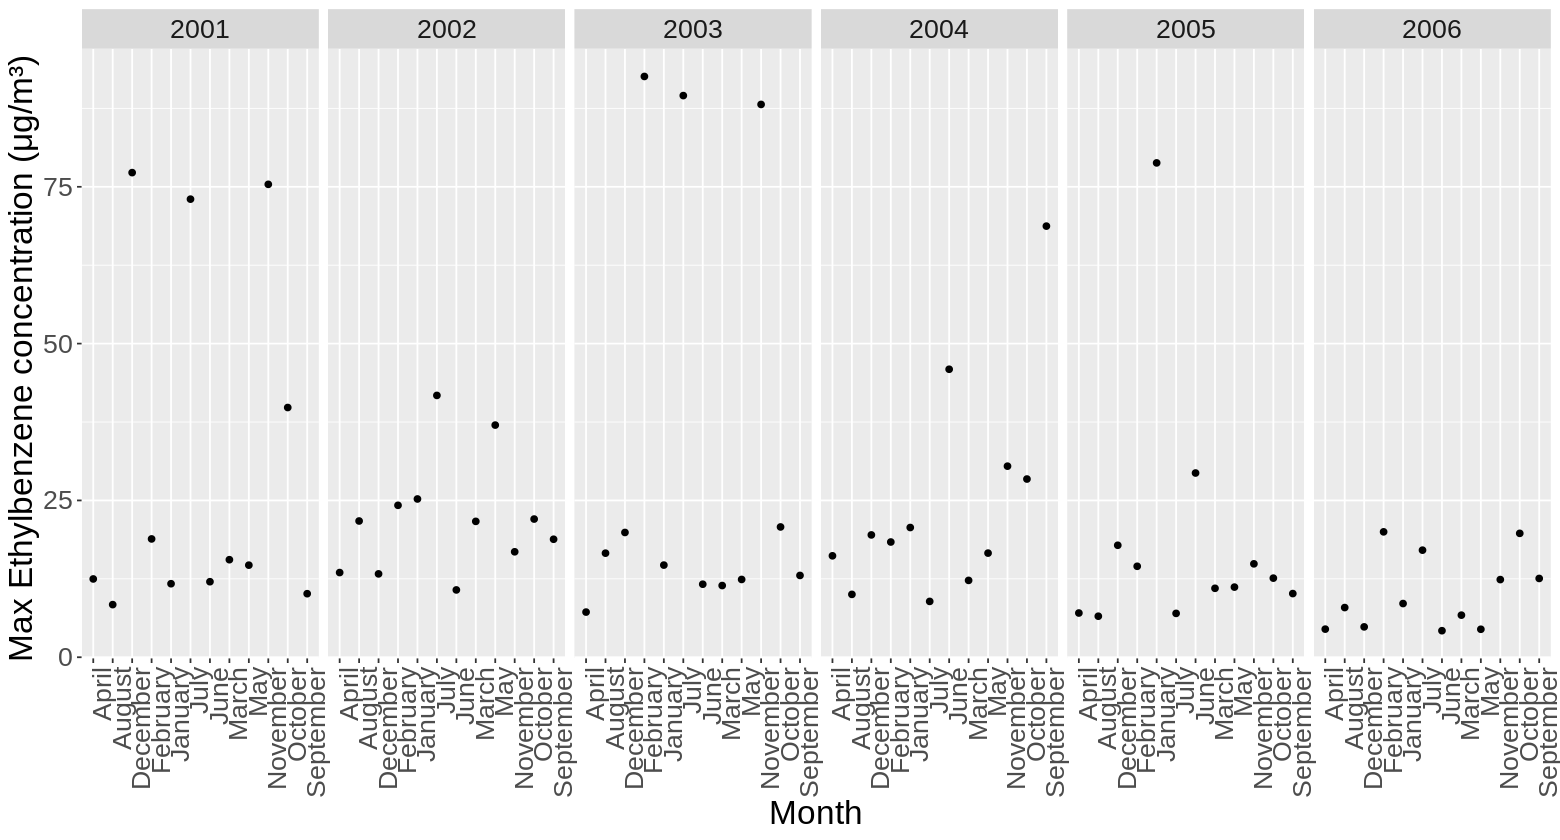

In [54]:
#... <- ... %>%
#    ggplot(aes(x = ..., y = ...)) + 
#    geom_point() +
#    xlab(...) + 
#    ylab(...) +
#    facet_grid(~ year) +
#    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
#    theme(text = element_text(size=20))

# your code here
madrid_plot <- madrid_pollution %>%
   ggplot(aes(x = mnth , y = max_ebe)) + 
   geom_point() +
   xlab("Month") + 
   ylab("Max Ethylbenzene concentration (μg/m³) ") +
   facet_grid(~ year) +
   theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
   theme(text = element_text(size=20))
madrid_plot

In [55]:
test_3.5()

[1] "Success!"


**Question 3.6**
<br> {points: 1}

Now we want to see which of the pollutants has decreased the most. Therefore, we must repeat the same thing that we did in the questions above but for every pollutant (using the original data set)! This is where `purrr`'s `map*` functions can be really helpful! 

First we will look at Madrid pollution in 2001 (filter for this year). Next we have to select the columns that should be excluded (such as the date). Lastly, use the `map_df()` function to create max values for all columns.

Fill in the `...` in the cell below. Copy and paste your finished answer and replace the `fail()`.

*Assign your answer to an object called `pollution_2001`.*

In [56]:
# ... <- madrid %>%
#     ...(year == 2001) %>%
#     select(-..., -year, -mnth) %>%
#     map_df(..., na.rm  = TRUE))

# your code here
pollution_2001 <- madrid %>%
    filter(year == 2001) %>%
    select(-date, -year, -mnth) %>%
    map_df(max, na.rm  = TRUE)
pollution_2001

BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49.94,10.39,77.26,93.12,2.42,271.3,1416,103,173.1,266.3,103,137.1,4.77,242.9


In [57]:
test_3.6()

[1] "Success!"


**Question 3.7**
<br> {points: 1}

Now repeat what you did for Question 3.6, but filter for 2006 instead. 

*Assign your answer to an object called `pollution_2006`.*

In [58]:
# your code here
pollution_2006 <- madrid %>%
    filter(year == 2006) %>%
    select(-date, -year, -mnth) %>%
    map_df(max, na.rm  = TRUE)
pollution_2006

BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.9,3.48,19.99,54.87,0.97,287.1,1274,31.39,132,268.6,26.95,66.22,2.84,64.84


In [59]:
test_3.7()

[1] "Success!"


**Question 3.8** 
<br> {points: 1}

Which pollutant decreased by the greatest magnitude between 2001 and 2006? Given that your the two objects you just created, `pollution_2001` and `pollution_2006` are data frames with the same columns you should be able to subtract the two objects to find which pollutant decreased by the greatest magnitude between the two years. 

*Assign your answer to an object called `answer3.8`. Make sure to write the answer exactly as it is given in the data set.* Example: 

```
answer3.8 <- "BEN"
```

In [60]:
# Replace the fail() with your answer. 

# your code here
answer3.8 <- "TOL"

In [61]:
test_3.8()

[1] "Success!"


**Question 3.9**
<br> {points: 1}

Given that there were only 14 columns in the data frame above, you could use your eyes to pick out which pollutant decreased by the greatest magnitude between 2001 and 2006. But what would you do if you had 100 columns? Or 1000 columns? It would take A LONG TIME for your human eyeballs to find the biggest difference. Maybe you could use the min funcion:

In [62]:
# run this cell
pollution_2006 - pollution_2001
min(pollution_2006 - pollution_2001)

BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-33.04,-6.91,-57.27,-38.25,-1.45,15.80002,-142,-71.61,-41.10001,2.300018,-76.05,-70.88,-1.93,-178.06


[1] -178.06

This is a step in the right direction, but you get the value and not the column name... What are we to do? Tidy our data! Our data is not in tidy format, and so it's difficult to access the values for the variable pollutant because they are stuck as column headers. Let's use `pivot_longer` to tidy our data and make it look like this:

| pollutant | value  |
|-----------|--------|
| BEN       | -33.04 |
| CO        | -6.91  |
| ...       | ...    |

To answer this question, fill in the `...` in the cell below. Copy and paste your finished answer and replace the `fail()`.

*Assign your answer to an object called `pollution_diff` and ensure it has the same column names as the table pictured above.*

In [63]:
pollution_diff  <- pollution_2006 - pollution_2001
#pollution_diff  <- ... %>% 
#    pivot_longer(cols = everything(), 
#           names_to = ..., 
#           values_to = ...)

# your code here
pollution_diff  <- pollution_diff %>% 
   pivot_longer(cols = everything(), 
          names_to = "pollutant", 
          values_to = "value")
pollution_diff

pollutant,value
<chr>,<dbl>
BEN,-33.04
CO,-6.91
EBE,-57.27
⋮,⋮
SO_2,-70.88
TCH,-1.93
TOL,-178.06


In [64]:
test_3.9()

[1] "Success!"


**Question 3.10**
<br> {points: 1}

Now that you have tidy data, you can use `arrange` and `desc` to order the data in descending order. Each element of the `value` column corresponds to an amount of decrease in a pollutant; so the *largest decrease* in pollutant should be *most negative entry*, i.e., the last row in the resulting dataframe. Therefore, we can take the sorted dataframe and pipe it to `tail` (with the argument `n = 1`) to return only the last row of the data frame.

(the function `tail` is just like `head`, except it returns the last rows of the dataframe instead of the first rows.)

To answer this question, fill in the `...` in the cell below. Copy and paste your finished answer and replace the `fail()`.

*Assign your answer to an object called `max_pollution_diff`.*

In [65]:
#... <- ... %>% arrange(desc(...)) %>% 
#    tail(n = 1)

# your code here
max_pollution_diff <- pollution_diff %>% arrange(desc(value)) %>% 
                    tail(n = 1)
max_pollution_diff

pollutant,value
<chr>,<dbl>
TOL,-178.06


In [66]:
test_3.10()

[1] "Success!"


At the end of this data wrangling worksheet, we'll leave you with a couple quotes to ponder:

> “Happy families are all alike; every unhappy family is unhappy in its own way.” –– Leo Tolstoy

> “Tidy datasets are all alike, but every messy dataset is messy in its own way.” –– Hadley Wickham

*source: [Tidy data chapter](https://r4ds.had.co.nz/tidy-data.html) from R for Data Science by Garrett Grolemund & Hadley Wickham*

In [67]:
source("cleanup_worksheet_03.R")